In [1]:
import pandas as pd
df = pd.read_csv('/content/Pokemon.csv')
# prepare data
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary', '#']
df = df[types].drop(columns = drop_cols)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [2]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

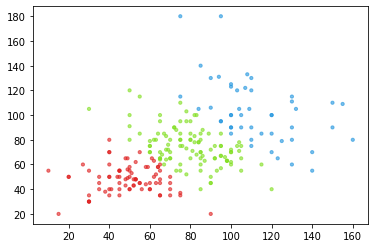

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)

In [ ]:
#Multiple dimensions

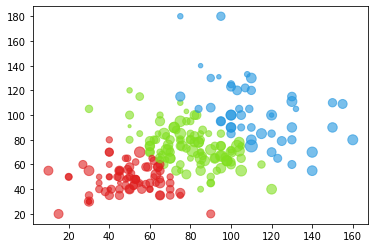

In [4]:
plt.scatter(df.Attack, df.Defense, c=df.c, s=df.Speed, alpha = 0.6)

In [ ]:
!pip install ipympl

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
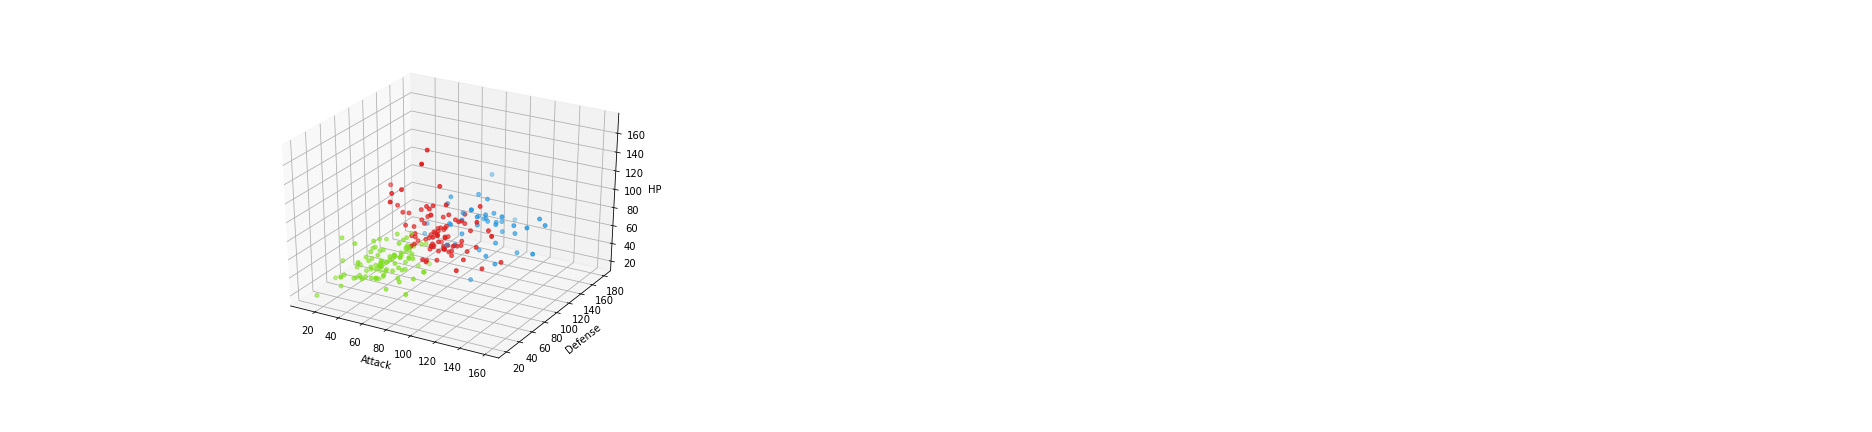

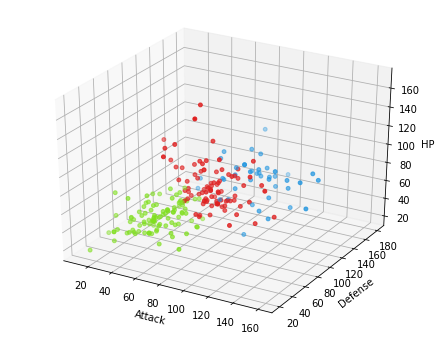

In [7]:
#3D
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()

Text(0, 0.5, 'Defense')

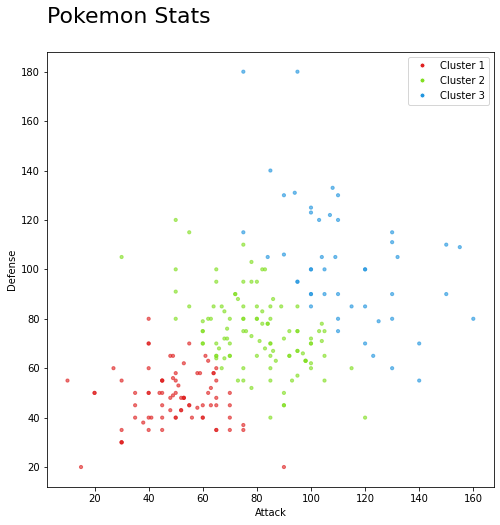

In [8]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0, 0.5, 'Defense')

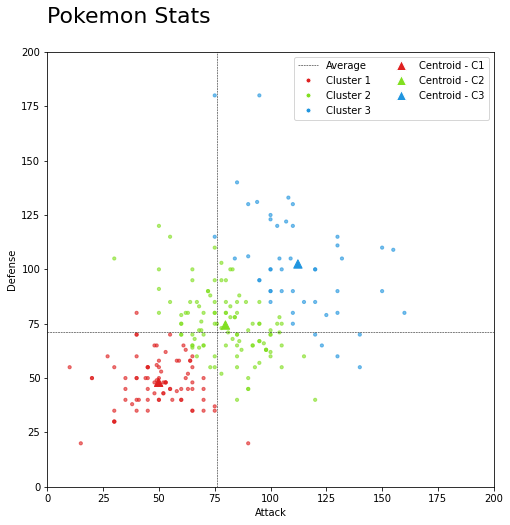

In [9]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Attack mean
plt.plot([df.Attack.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
plt.xlim(0,200)
# plot Defense mean
plt.plot([0,200], [df.Defense.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,200)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0, 0.5, 'Defense')

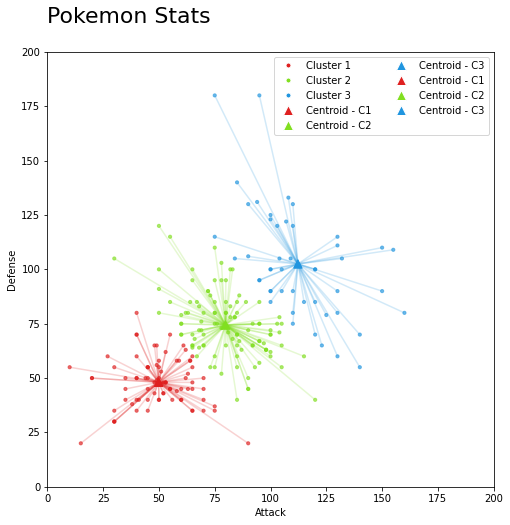

In [10]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val.Attack, val.cen_x,]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
plt.xlim(0,200)
plt.ylim(0,200)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

(0.0, 200.0)

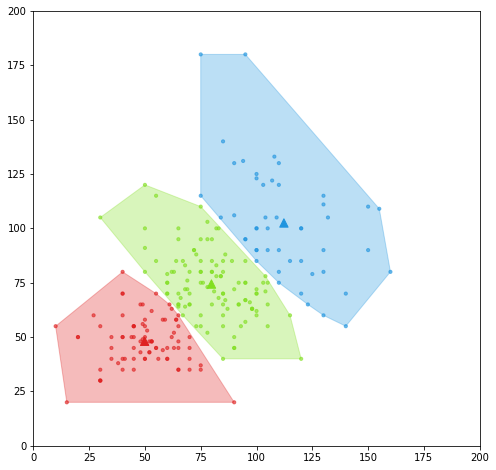

In [11]:
#Convex Hull
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)

(0.0, 200.0)

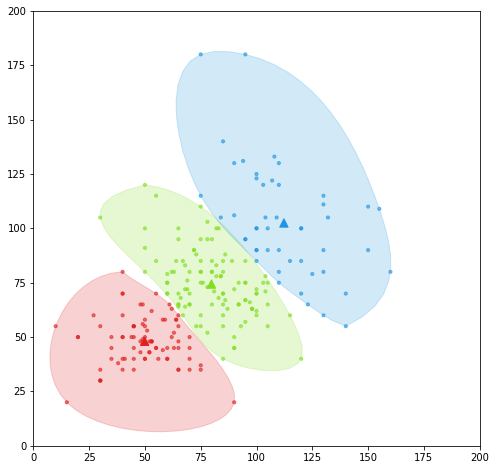

In [12]:
from scipy import interpolate
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
    
plt.xlim(0,200)
plt.ylim(0,200)
